In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re
from soynlp.tokenizer import RegexTokenizer
import konlpy
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager

import os
import shutil
import platform
from collections import Counter


import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family
plt.rcParams['axes.unicode_minus'] = False


In [2]:
news = pd.read_csv("news.csv")

In [3]:
tokenizer = RegexTokenizer()
tokenizer

title = news.loc[:, 'title']
title = news['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9 ]", " ", regex=True)
tokened_title = title.apply(tokenizer.tokenize)
tokened_title[0:5]

0                              [미국에, 올인, 후폭풍이, 몰려온다]
1                        [상처, 입은, 이들의, 아주, 각별한, 반상회]
2    [단독, 주가조작일당, 투자자, 몰래, 계좌, 만들어, 멋대로, 매매, 피해, 키워]
3                        [한, 미, 일, 핵우산, 협의체, 신설, 검토]
4                  [1, 인당, GDP, 18, 년만에, 대만에, 추월당했다]
Name: title, dtype: object

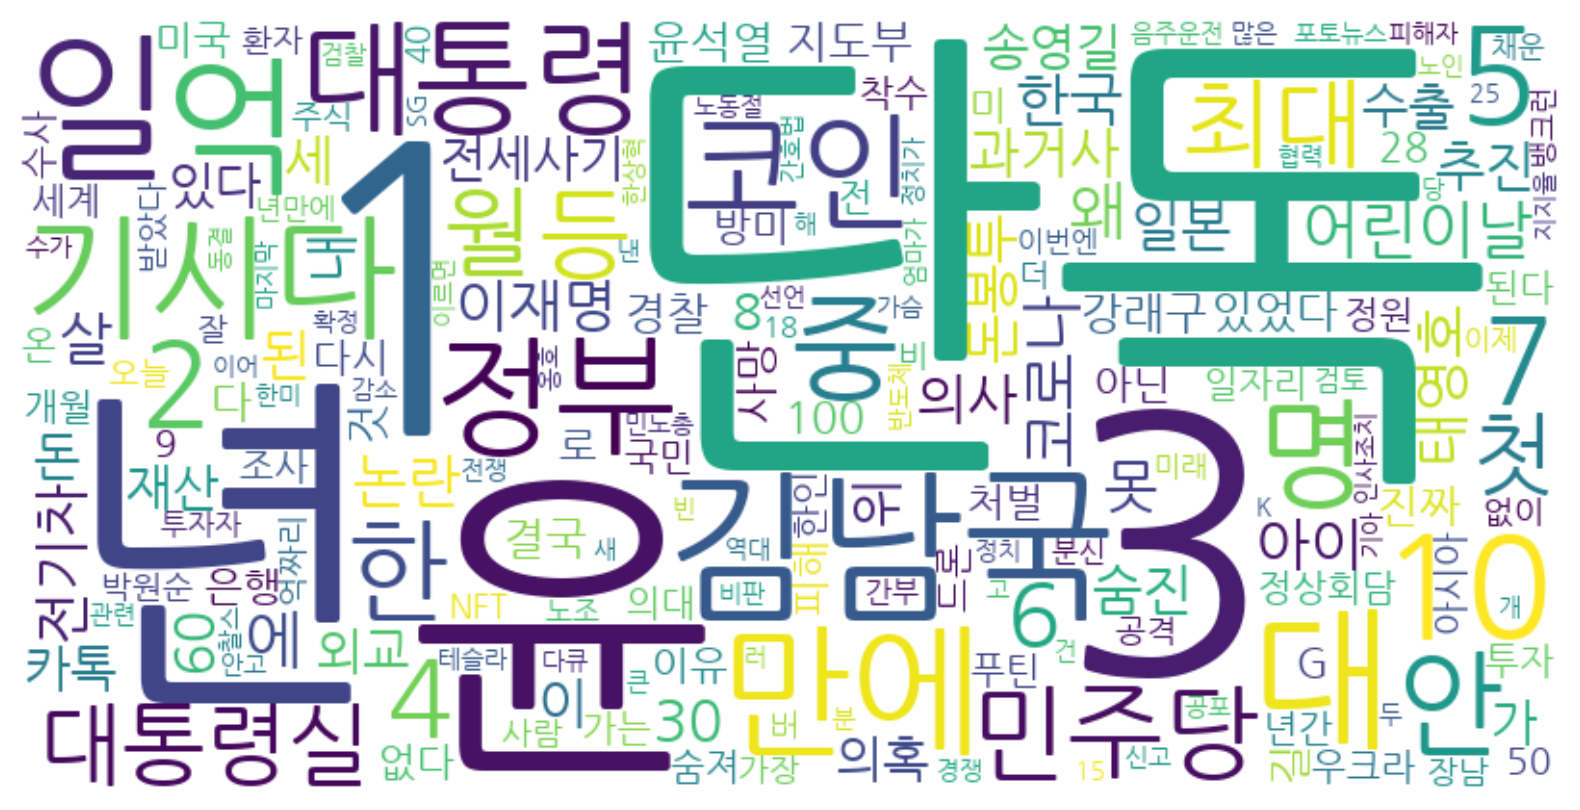

In [4]:
flattened_list = tokened_title.explode().tolist()
counter = Counter(flattened_list)

wordcloud = WordCloud(font_path = "path/to/NanumGothic.ttf",
                      background_color = "white",
                      width = 800,
                      height = 400,).generate_from_frequencies(counter)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<hr>

#### **명사만 추출하여 워드클라우드 그리기**

<p align="left">
  <img src="before_dictionary.png" align="center" width="40%">
  <figcaption align="left"></figcaption>
</p>

**아래 과정을 거쳐 사용자 사전에 등록해야 할 명사 탐색**


In [5]:
# okt = Okt()

# title = news.loc[:, 'title']
# tokenized_nouns = []

# for title_text in title:
#     okted_text = okt.nouns(title_text)
#     tokenized_nouns.append(okted_text)

# news['tokenized_noun'] = tokenized_nouns

In [6]:
# nouns_list = news['tokenized_noun'].sum() 
# noun_frequencies = Counter(nouns_list)
# noun_frequencies.most_common()

In [7]:
source_jar = '/Users/henna/miniconda3/Lib/site-packages/konlpy/java/open-korean-text-2.1.0.jar'
destination_dir = '/Users/henna/miniconda3/Lib/site-packages/konlpy/java/okt'

os.makedirs(destination_dir, exist_ok=True)

shutil.copy(source_jar, destination_dir)

os.chdir(destination_dir)

os.system('jar xvf open-korean-text-2.1.0.jar')

0

**추가할 단어들**

In [8]:
# words = ['협의체','후폭풍','살처분','초미숙아','돈봉투','내로남불','물타기','종합세트','부위원장','혁신위','마브렉스','거래실명제','인출','한달','전기료','연체율','깡통전세','다음달','고점','기도회','키워드','경질론','우크라',
# '몰빵','과거사','뺑뺑이','간호법','최고령','공정성','재청구','고졸','탕춘대','세계유산','서울대생','최장','최대폭','최다','최정예','보좌진','우회전','확진자','구조','구심점','전망치','가야고분군','최고위','당원권',
# '시찰단','노부부','도미노','연계','입시생','탈원전','셔틀외교','고령사회','초저임금','연금개혁','자문단','암살단','한인가족','해법','서울시사회서비스원','암환자','역전세','자영업자','장려금','출연금','쉼터',
# '우크라판','인천상륙작전','패스트트랙','관람료','등산객','통행세','간담회','징용해법','전략핵잠','이달','건강법','공무원법','방통위원장','셔틀외교','백마고지','암사자','생태교란종','가짜뉴스','흙수저','급식실','사용량','라방',
# '화마','우회전','의료진','중징계','상호비판','전세사기','임차인','위기감','배신감','댓글공작','물갈이','바이탈','임시선별검사소','무료급식소','한국일보','환생','미스매치','대부업','황금연휴','일가족','월가','일파만파',
# '절도범','총격범','장발장법','저소득층','합격점','정치방역','쟁점화','서울대생','비소식','인천대공원','무정차','먹칠','보충제','생산직','글로벌혁신특구','남부지검','세입자','자구안','한전공대','기자단','돌봄','폰지',
# '단톡방','임대인','청년층','모내기철','자구책','퍼스트리퍼블릭','진상조사단','키움증권','연준','강제동원','지도부','온도차','포토뉴스','오너리스크','한국노총','중대재해','황금박쥐상','신공항','사명감','핵심지지층','뜬장','저소득']
# '\n'.join(sorted(words))

# names = ['김남국','태영호','젤렌스키','강래구','김익래','서동주','용혜인','기시다','진혜원','폼페이오','라덕연','유동규','정진상','송영무','전우원','푸바오','장경태','류호정']
# "\n".join(sorted(names))

In [9]:
with open(f"/Users/henna/miniconda3/Lib/site-packages/konlpy/java/okt/org/openkoreantext/processor/util/noun/names.txt") as f:
    names_data = f.read()

names_data += '\n강래구\n기시다\n김남국\n김익래\n라덕연\n류호정\n서동주\n송영무\n용혜인\n유동규\n장경태\n전우원\n정진상\n젤렌스키\n진혜원\n태영호\n폼페이오\n푸바오'

with open(f"/Users/henna/miniconda3/Lib/site-packages/konlpy/java/okt/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(names_data)
    
    
with open(f"/Users/henna/miniconda3/Lib/site-packages/konlpy/java/okt/org/openkoreantext/processor/util/noun/nouns.txt") as f:
    nouns_data = f.read()

nouns_data += '\n가야고분군\n가짜뉴스\n간담회\n간호법\n강제동원\n거래실명제\n건강법\n경질론\n고령사회\n고점\n고졸\n공무원법\n공정성\n과거사\n관람료\n구심점\n \
              구조\n글로벌혁신특구\n급식실\n기도회\n기자단\n깡통전세\n남부지검\n내로남불\n노부부\n다음달\n단톡방\n당원권\n대부업\n댓글공작\n도미노\n돈봉투\n \
              돌봄\n등산객\n뜬장\n라방\n마브렉스\n먹칠\n모내기철\n몰빵\n무료급식소\n무정차\n물갈이\n물타기\n미스매치\n바이탈\n방통위원장\n배신감\n백마고지\n \
              보좌진\n보충제\n부위원장\n비소식\n뺑뺑이\n사명감\n사용량\n살처분\n상호비판\n생산직\n생태교란종\n서울대생\n서울대생\n서울시사회서비스원\n세계유산\n \
              세입자\n셔틀외교\n셔틀외교\n속도전\n쉼터\n시찰단\n신공항\n암사자\n암살단\n암환자\n역전세\n연계\n연금개혁\n연준\n연체율\n오너리스크\n온도차\n우크라\n \
              우크라판\n우회전\n월가\n위기감\n의료진\n이달\n인천대공원\n인천상륙작전\n인출\n일가족\n일파만파\n임대인\n임시선별검사소\n임차인\n입시생\n자구안\n \
              자구책\n자문단\n자영업자\n장려금\n장발장법\n재청구\n쟁점화\n저소득\n저소득층\n전기료\n전략핵잠\n전망치\n전세사기\n절도범\n정치방역\n종합세트\n \
              중대재해\n중징계\n지도부\n진상조사단\n징용해법\n청년층\n초미숙아\n초저임금\n총격범\n최고령\n최고위\n최다\n최대폭\n최장\n최정예\n출연금\n \
              키움증권\n키워드\n탈원전\n탕춘대\n통행세\n패스트트랙\n퍼스트리퍼블릭\n포토뉴스\n폰지\n한국노총\n한국일보\n한달\n한인가족\n한전공대\n합격점\n \
              해법\n핵심지지층\n혁신위\n협의체\n화마\n확진자\n환생\n황금박쥐상\n황금연휴\n후폭풍\n흙수저'

with open(f"/Users/henna/miniconda3/Lib/site-packages/konlpy/java/okt/org/openkoreantext/processor/util/noun/nouns.txt", 'w') as f:
    f.write(nouns_data)
    
os.system('jar cvf open-korean-text-2.1.0.jar *')

shutil.move('open-korean-text-2.1.0.jar', source_jar)

'/Users/henna/miniconda3/Lib/site-packages/konlpy/java/open-korean-text-2.1.0.jar'

In [10]:
okt = Okt()

title = news.loc[:, 'title']
tokenized_nouns = []

for title_text in title:
    okted_text = okt.nouns(title_text)
    tokenized_nouns.append(okted_text)

news['tokenized_noun'] = tokenized_nouns
tokenized_nouns[0:5]

[['미국', '올인', '후폭풍'],
 ['상처', '이', '아주', '각별', '반상회'],
 ['단독', '주가조작', '일당', '투자자', '몰래', '계좌', '멋대로', '매매', '피해'],
 ['일', '핵우산', '협의체', '신설', '검토'],
 ['대만', '추월']]

In [11]:
# single_char_words = [word for word_list in news['tokenized_noun'] for word in word_list if len(word) == 1]
# print(set(single_char_words))

In [12]:
words_to_remove = ['가나', '가장', '간', '감', '감히', '개월', '거', '건', '건가', '건중', '걸', '것', '겸', '계속', '곧', '곳', '과', '구', '구합', 
                   '궂', '그', '그간', '그게', '그때', '급', '꽉', '끝내', '나', '나선', '난', '날', '남아', '내', '년', '노', '누가', '눌려', '니', 
                   '다', '다른', '다시', '달', '달라', '달랑', '대해', '더', '덩', '도', '도대체', '도운', '돈내', '돌연', '두', '뒤', '뒤엉킨', '듯', 
                   '때', '때문', '땐', '또', '뚝', '려고', '로', '를', '린', '마', '마다', '마리', '만', '만난', '만드', '맏', '맞선', '멋대로', '며', 
                   '면', '명', '모든', '몰던', '몰래', '못', '무슨', '뭐', '뭔가', '밀지', '발', '버', '별로', '보기', '부수', '부터', '비운', '빅', 
                   '빈', '뿐', '사드', '산', '살', '새', '선', '세', '속', '솔솔', '수', '수상한', '수십', '순', '신어', '쌩', '쓰기', '아예', '아주', 
                   '안', '안고', '안해', '알', '앗', '앞', '앤', '얄궂', '어쩌', '언제','얼마나', '에취', '여기', '여러', '여명', '오라', '온', '왜', 
                   '우뚝', '위', '은', '의', '이', '이기', '이번', '일만', '자라', '잡', '전', '제', '조만간', '주', '주기', '주년', '준', '줄', 
                   '줄줄', '중', '쫄딱', '쫄려', '차', '채', '채운', '첫', '최', '친', '타고', '탕', '태운', '판', '팽팽', '퍼', '푸나', '푸른', 
                   '하나로', '하나요', '하라', '하필', '해', '해도', '향', '후']


def remove_words(row):
    return [word for word in row if word not in words_to_remove]

news['tokenized_noun'] = news['tokenized_noun'].apply(remove_words)


In [13]:
news[news['tokenized_noun'].apply(lambda x: ('윤' in x) and ('대통령' in x))][['title', 'tokenized_noun']][0:5]

,title,tokenized_noun
14,기업 이익도 한반도 미래도 못 챙긴 윤 대통령의 ‘가치외교’,"[기업, 이익, 한반도, 미래, 윤, 대통령, 가치, 외교]"
28,노동절 ‘건폭몰이’ 비극…윤 대통령은 ‘법치’ 강조만,"[노동절, 건폭, 몰이, 비극, 윤, 대통령, 법치, 강조]"
29,건설 노동자 분신…이 와중에 윤 대통령은 ‘노조 비판’ 일색,"[건설, 노동자, 분신, 와중, 윤, 대통령, 노조, 비판, 일색]"
44,"윤 대통령 “중국, 워싱턴 선언 트집…도대체 어쩌라는 건가”","[윤, 대통령, 중국, 워싱턴, 선언, 트집]"
78,"방통위 장악 속도전…윤 대통령, 이르면 다음주 한상혁 위원장 면직","[방통위, 장악, 도전, 윤, 대통령, 다음주, 한상혁, 위원장, 면직]"


In [14]:
news['tokenized_noun'] = news['tokenized_noun'].apply(lambda x: ['윤대통령'] + [word for word in x if word not in ['윤', '대통령']] if '윤' in x and '대통령' in x else x)
news[news['tokenized_noun'].apply(lambda x: ('윤대통령' in x))][['title', 'tokenized_noun']][0:5]

,title,tokenized_noun
14,기업 이익도 한반도 미래도 못 챙긴 윤 대통령의 ‘가치외교’,"[윤대통령, 기업, 이익, 한반도, 미래, 가치, 외교]"
28,노동절 ‘건폭몰이’ 비극…윤 대통령은 ‘법치’ 강조만,"[윤대통령, 노동절, 건폭, 몰이, 비극, 법치, 강조]"
29,건설 노동자 분신…이 와중에 윤 대통령은 ‘노조 비판’ 일색,"[윤대통령, 건설, 노동자, 분신, 와중, 노조, 비판, 일색]"
44,"윤 대통령 “중국, 워싱턴 선언 트집…도대체 어쩌라는 건가”","[윤대통령, 중국, 워싱턴, 선언, 트집]"
78,"방통위 장악 속도전…윤 대통령, 이르면 다음주 한상혁 위원장 면직","[윤대통령, 방통위, 장악, 도전, 다음주, 한상혁, 위원장, 면직]"


In [15]:
english_words = ['G2', 'G7', 'AI', 'NFT', 'MBC', 'IRA', 'FIU', 'KCI', 'DMZ', 'TV', 'SG', 'DNA']
for word in english_words:
    news.loc[news['title'].apply(lambda x: word in x), 'tokenized_noun'] = news[news['title'].apply(lambda x: word in x)]['tokenized_noun'].apply(lambda x: x + [word])

chinese_words = [('尹', '윤대통령'),
                 ('日', '일본'),
                 ('美', '미국'),
                 ('中', '중국'),
                 ('北', '북한'),
                 ('英', '영국'),
                 ('野', '야당'),
                 ('與', '여당')]
for word, korean in chinese_words:
    condition = news['title'].apply(lambda x: word in x)
    news.loc[condition, 'tokenized_noun'] = news[condition]['tokenized_noun'].apply(lambda x: x + [korean]) 
    
news.loc[news['title'].apply(lambda x: '韓美日' in x), 'tokenized_noun'] = news[news['title'].apply(lambda x: '韓美日' in x)]['tokenized_noun'].apply(lambda x: ['한미일'] + [word for word in x if word not in ['일본', '미국']] if '미국' in x and '일본' in x else x)
news.loc[news['title'].apply(lambda x: '韓日' in x), 'tokenized_noun'] = news[news['title'].apply(lambda x: '韓日' in x)]['tokenized_noun'].apply(lambda x: x + ['한일']+ [word for word in x if word != '일본'] if '일본' in x else x)

In [16]:
pairs = [
    ('워싱턴선언', ['워싱턴', '선언']),
    ('반도체법', ['반도체', '법']),
    ('건설노동자', ['건설', '노동자']),
    ('가치외교', ['가치', '외교']),
    ('국방혁신위', ['국방', '혁신위']),
    ('블레어하우스', ['블레어', '하우스']),
    ('의료종사자', ['의료', '종사']),
    ('한미일', ['한미', '일']),
    ('핵미사일', ['핵', '미사일']),
    ('N수생', ['수생']),
    ('챗GPT', ['챗']),
    ('4대강', ['대강']),
    ('찰스3세', ['찰스']),
    ('임대3법', ['임대', '법']),
    ('초기화', ['초기']),
    ('K방역', ['방역']),
    ('K전기차', ['전기차']),
    ('毛퓰리즘', ['퓰', '리즘'])
]

for after, before in pairs:
    condition = news['tokenized_noun'].apply(lambda x: all(part in x for part in before))
    news['tokenized_noun'] = news.apply(
        lambda row: [after] + [word for word in row['tokenized_noun'] if word not in before] 
                      if condition[row.name] 
                      else row['tokenized_noun'],
        axis=1)
    
news.loc[news['title'].apply(lambda x: '한·일' in x), 'tokenized_noun'] = news[news['title'].apply(lambda x: '한·일' in x)]['tokenized_noun'].apply(lambda x: ['한일'] + [word for word in x if word != '일'] if '일' in x else x)
news.loc[news['title'].apply(lambda x: '한-일' in x), 'tokenized_noun'] = news[news['title'].apply(lambda x: '한-일' in x)]['tokenized_noun'].apply(lambda x: ['한일'] + [word for word in x if word != '일'] if '일' in x else x)

In [17]:
pairs = [('정치', '정치가'),
         ('구조', '구조도')]

for after, before in pairs:
    news['tokenized_noun'] = news['tokenized_noun'].apply(lambda x: [after if before in word else word for word in x])

In [18]:
news[news['title'].apply(lambda x: '毛퓰리즘' in x)]['tokenized_noun']

128    [毛퓰리즘, 지자체, 이재명, 암환자, 암, 탈모, 지원, 충격]
Name: tokenized_noun, dtype: object

**전체 기사 제목 워드클라우드**

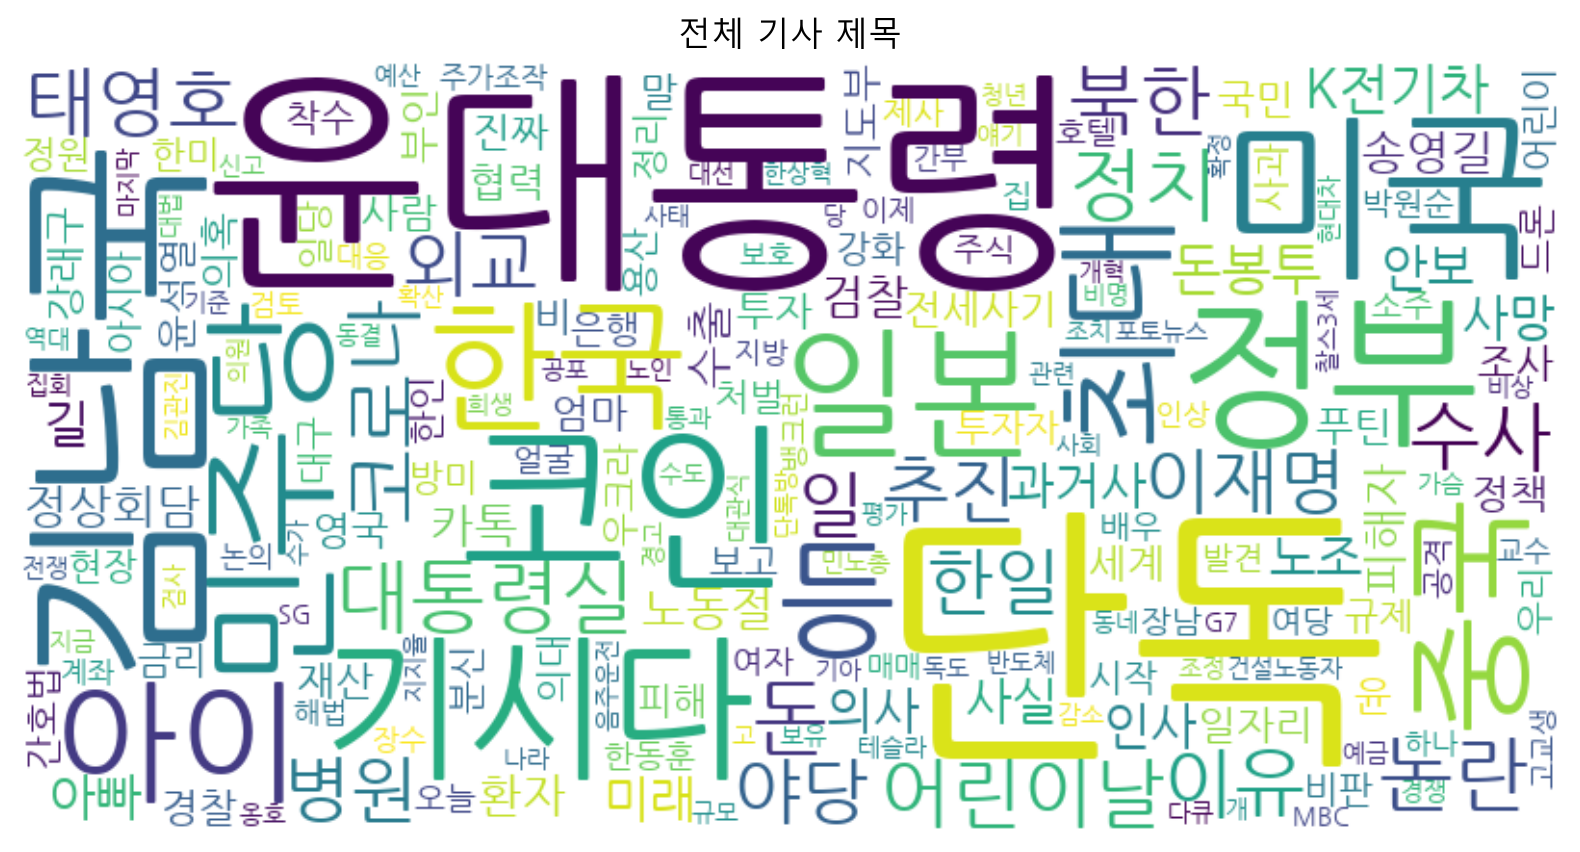

In [19]:
flattened_list = news['tokenized_noun'].explode().tolist()
noun_counter = Counter(flattened_list)

wordcloud = WordCloud(font_path = "path/to/NanumGothic.ttf",
                      background_color = "white",
                      width = 800,
                      height = 400,).generate_from_frequencies(noun_counter)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("전체 기사 제목")
plt.axis("off")
plt.show()

In [20]:
headline_flattened_list = news[news['type'] == 'headline']['tokenized_noun'].explode().tolist()
noun_counter = Counter(headline_flattened_list)
headline_top_nouns = noun_counter.most_common(5)

rankingnews_flattened_list = news[news['type'] == 'ranking']['tokenized_noun'].explode().tolist()
noun_counter = Counter(rankingnews_flattened_list)
rankingnews_top_nouns = noun_counter.most_common(5)

print(f"헤드라인 뉴스 제목 최다 언급 명사 TOP5: {headline_top_nouns}")
print(f"랭킹뉴스 제목 최다 언급 명사 TOP5: {rankingnews_top_nouns}")

헤드라인 뉴스 제목 최다 언급 명사 TOP5: [('윤대통령', 21), ('단독', 18), ('기시다', 11), ('미국', 9), ('정부', 9)]
랭킹뉴스 제목 최다 언급 명사 TOP5: [('단독', 30), ('김남국', 18), ('코인', 14), ('윤대통령', 13), ('미국', 9)]


**헤드라인뉴스와 랭킹뉴스 제목에 사용된 명사 빈도 TOP5를 제외한 워드클라우드**

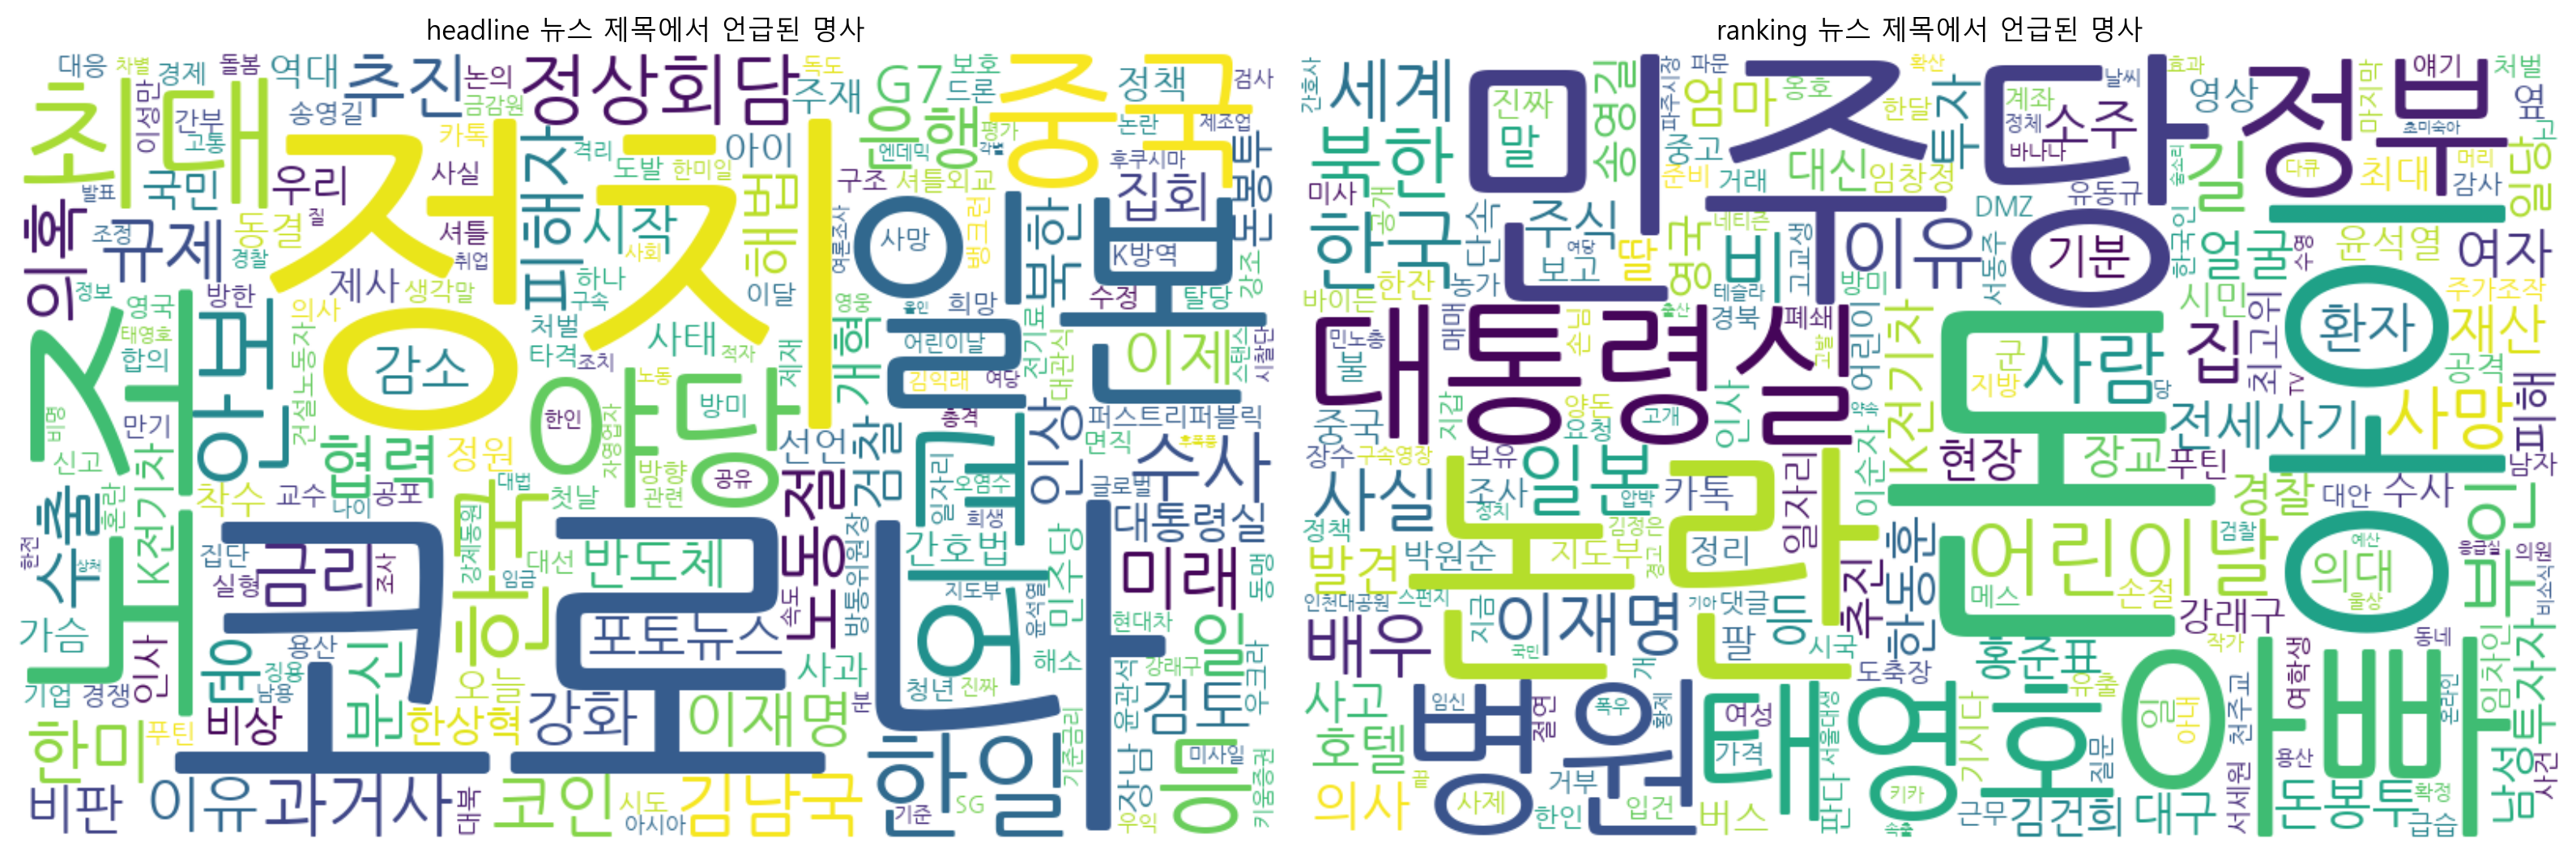

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (16,6), sharex=True)

for i, type in enumerate(['headline', 'ranking']):
    flattend_list=news[news['type'] == type]['tokenized_noun'].explode().tolist()
    noun_counter=Counter(flattend_list)
    top_nouns=noun_counter.most_common(5)
    
    filtered_noun_counter = {noun: count for noun, count in noun_counter.items() if noun not in dict(top_nouns)}

    wordcloud = WordCloud(
        font_path="path/to/NanumGothic.ttf",
        background_color="white",
        width = 800,
        height = 500,
    ).generate_from_frequencies(filtered_noun_counter)

    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    plt.tight_layout()
    axes[i].set_title(f"{type} 뉴스 제목에서 언급된 명사")
